In [2]:
import pandas as pd
import spacy
import os
import matplotlib.pyplot as plt # Make sure to import matplotlib
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#Loading NER model
nlp = spacy.load("./Model/training/model-best")

In [4]:
#Loading dataset
chembl_35 = pd.read_csv('Results/ner_chembl_35.tsv', sep='\t')

In [5]:
chembl_35.method.nunique()

44185

In [6]:
mcounts = chembl_35.method.value_counts().reset_index()

In [7]:
mcounts['count_percentage'] = (mcounts['count'] / mcounts['count'].sum()) * 100

In [8]:
mcounts['cumulative_count'] = mcounts['count'].cumsum()

In [9]:
mcounts['cumulative_percentage'] = mcounts['count_percentage'].cumsum()

Annotation added: '2825 methods' at index 2825


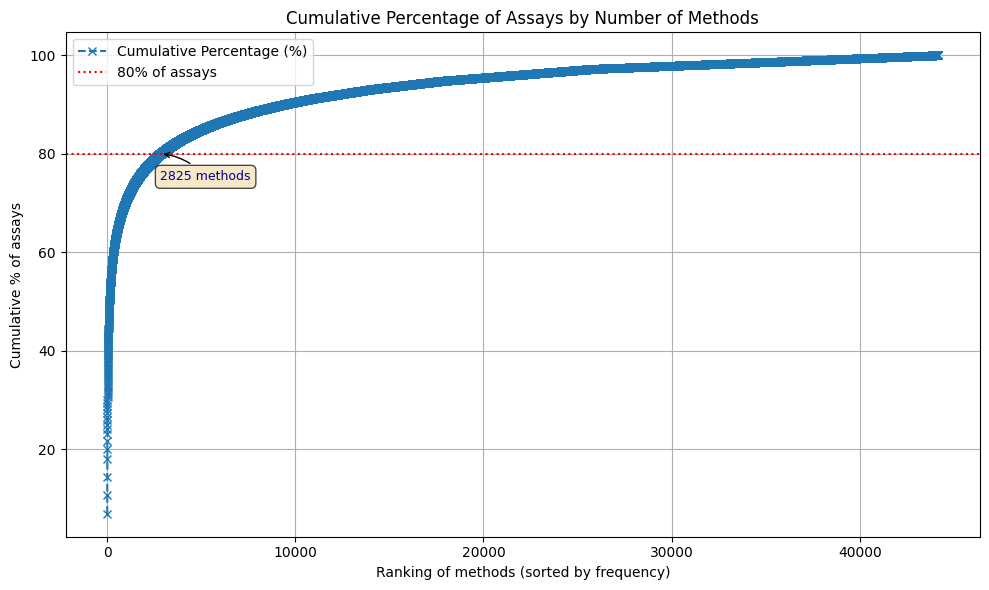

In [12]:

fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and an axes object

# Plot cumulative_percentage on the primary y-axis
mcounts.plot(y='cumulative_percentage',
                 kind='line',
                 marker='x', # Use a different marker
                 linestyle='--', # Use a dashed line
                 ax=ax,      # Plot on the same axes
                 label='Cumulative Percentage (%)') # Label for the legend

# --- Add the horizontal line at y=80 ---
target_y = 80 # Define target y-value
ax.axhline(y=target_y,
           color='red',          # Color of the line
           linestyle=':',        # Style of the line
           linewidth=1.5,        # Thickness of the line
           label=f'{target_y}% of assays') # Label includes the value
# ---

# --- Find intercept and add annotation --- V2 ---
# Find the first index where cumulative percentage meets or exceeds the target
try:
    # Filter rows at or above the target
    intercept_df = mcounts[mcounts['cumulative_percentage'] >= target_y]

    if not intercept_df.empty:
        # Get the index (x-value) of the first such row
        x_intercept_index = intercept_df.index[0]

        # Define the text for the annotation
        # (Using the index directly as it represents the number of methods)
        annotation_text = f"{x_intercept_index} methods"

        # Add the annotation to the plot
        ax.annotate(
            annotation_text,
            xy=(x_intercept_index, target_y), # Point annotation points to (on the 80% line)
            xytext=(x_intercept_index + 0.5, target_y - 6), # Position of text (offset slightly right and up)
            arrowprops=dict(
                arrowstyle="->", # Style of the arrow
                color='black',
                connectionstyle="arc3,rad=0.2" # Curvature of the arrow
            ),
            fontsize=9,
            color='darkblue',
            ha='left',       # Horizontal alignment of text
            va='bottom',     # Vertical alignment of text
            bbox=dict(boxstyle="round,pad=0.4", fc="wheat", alpha=0.7) # Text box style
        )
        print(f"Annotation added: '{annotation_text}' at index {x_intercept_index}")

    else:
        # If the line never reaches the target
        print(f"Note: Cumulative percentage never reached {target_y}%. No annotation added.")

except Exception as e:
    # Catch potential errors during index lookup or plotting
    print(f"An error occurred while adding annotation: {e}")
# --- End of Annotation Logic ---

# --- Customize the Plot ---
ax.set_title('Cumulative Percentage of Assays by Number of Methods')
ax.set_xlabel('Ranking of methods (sorted by frequency)') # X-axis is the DataFrame index
ax.set_ylabel('Cumulative % of assays')
ax.grid(True) # Add a grid for better readability
ax.legend() # Show the legend based on the 'label' arguments

# --- Show the Plot ---
plt.tight_layout() # Adjust layout
plt.savefig("../1_NER_method/Results/cumulative_assays_by_method.png", dpi=400)
plt.show()

In [ ]:
indices_to_show = [0] + list(range(1, 31, 1))
show = mcounts[['method', 'count','cumulative_percentage']].loc[indices_to_show]
show

,method,count,cumulative_percentage
0,MTT assay,45793,6.910326
1,sulforhodamine B assay,25249,10.720489
2,Western blot analysis,24214,14.374467
3,SRB assay,23681,17.948014
4,broth microdilution method,14574,20.147282
5,ELISA,10705,21.762704
6,Kinomescan method,8830,23.095182
7,fluorescence assay,6218,24.033501
8,agar dilution method,6179,24.965934
9,flow cytometry,5866,25.851134
